#Task 1
###The legend shall speak that this situation was in WW2. There are two actors in this story: a sniper and an officer. Both knew about each other's existence. There was a river between them. The officer was always sitting in a trench, but the sniper knew his location and already calculated the distance to the target ($L, m$). After a while cargo ship appeared, which blocked the direct vision of the trench. The officer decided to stand up to stretch his legs. The sniper assumed that it might happened and make a shot, hitting the officer. Let's check this story.


![HW5](https://drive.google.com/uc?export=view&id=1MHE5-D897bMATzCwySSvBm0Xvr7cvKuR)


###**Needed variables:**
- $m = 13.6\, g$
- $L = 1500$
- $M_1 = 1.3*10^{-5}$
- $v_0 = 870\, m/s$


###**Find:**
- $α$
- $h_{max}$
- $F_C(v^2) = -kv \vec{v}$



#Neglect air drag

##Researh object:
bullet (a particle)

##Motion:
projectile motion

##Conditions:

<div style="column-count: 2;">
  
Initial:
- $x_0 = 0$
- $y_0 = 0$
- $\dot{x}_0 = v_0 \cos(\alpha)$
- $\dot{y}_0 = v_0 \sin(\alpha)$

Final:
- $x_f = L$
- $y_f = 0$
- $\dot{x}_0 = ?$
- $\dot{y}_0 = ?$

</div>

<!-- Initial: // Final:
x_0 = 0 // x_f = L
y_0 = 0 // y_f = 0
\dot x_0 = v0*cos(alpha)
\dot y_0 = v0*sin(alpha) -->


##Force analysis:
$$m \vec a = m \vec g$$

<!-- $$m a_x = 0$$
$$m a_y = -g$$ -->
\begin{cases}
m a_x &= 0 \\
m a_y &= -m g
\end{cases}

\begin{cases}
\int m a_x &= \int 0 \\
\int m a_y &= \int -m g
\end{cases}

\begin{cases}
m v_x &= C \\
m v_y &=  -m g t + C_2
\end{cases}

###**Projections:**

\begin{align}
(1) X: v_0 \cos(\alpha) t &= L \\
(2) Y: v_0 \sin(\alpha) t - \frac{g t^2}{2} &= 0
\end{align}

<!-- - **X:** $V_0 \cos(\alpha) t = L$

- **Y:** $v_0 \sin(\alpha) t - \dfrac{g t^2}{2} = 0$ -->

From (1), we get that $t = \dfrac{L}{v_0 \cos(\alpha)}$.

Substituting $t$ into (2), we get:
$$v_0 \sin(\alpha) \frac{L}{v_0 \cos(\alpha)} - g \frac{L^2}{2 v_0^2 \cos^2(\alpha)} = 0$$

Simplifying, we have:
$$\frac{2v_0^2 \sin(\alpha) \cos(\alpha) L - g L^2}{2 v_0^2 \cos^2(\alpha)} = 0$$

Further simplification gives:
$$L \left( \frac{v_0^2 \sin(2\alpha) - g L}{2v_0^2 \cos^2(\alpha)} \right) = 0$$

Finally:
$$\sin(2\alpha) = \frac{g L}{v_0^2}$$


###Calculate the angle:

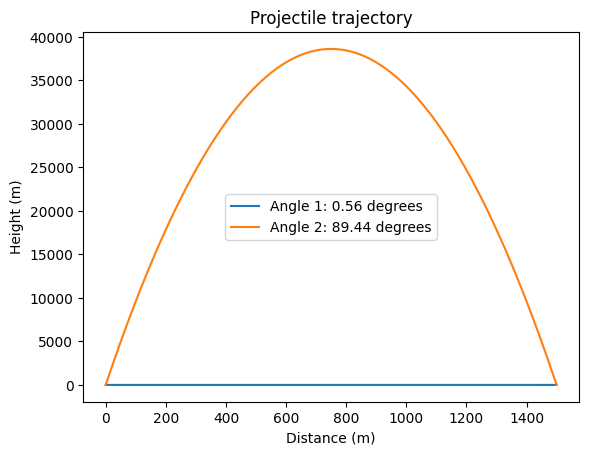

Angles: [0.556414926306735, 89.4435850736933]


In [ ]:
import sympy as sp
import numpy as np
from sympy import Symbol, solve
import matplotlib.pyplot as plt

# Define the constants
L = 1500
v0 = 870
g = 9.8

# Calculate the angle
alpha = Symbol('alpha')
alphas = solve(L*(v0**2 *sp.sin(2*alpha)-g*L), alpha)

# Calculate the time
t = Symbol('t')
t_ = []

for alpha_ in alphas:
  t_.append(solve(v0*sp.sin(alpha_)*t - g*t**2/2, t))
extract_t = lambda x: x[1]
time_ = list(map(extract_t, t_))

# The first angle
alpha_num1 = float(alphas[0].evalf())
t_vals1 = np.linspace(0, float(time_[0]), 10000)
h_1 = [v0 * np.sin(alpha_num1) * t - (g * t**2) / 2 for t in t_vals1]
x_1 = [v0 * np.cos(alpha_num1)*t for t in t_vals1]

# The second angle
alpha_num2 = float(alphas[1].evalf())
t_vals2 = np.linspace(0, float(time_[1]), 10000)
h_2 = [v0 * np.sin(alpha_num2) * t - (g * t**2) / 2 for t in t_vals2]
x_2 = [v0 * np.cos(alpha_num2)*t for t in t_vals2]


plt.plot(x_1, h_1, label=f'Angle 1: {alpha_num1*180/np.pi:.2f} degrees')
plt.plot(x_2, h_2, label=f'Angle 2: {alpha_num2*180/np.pi:.2f} degrees')

plt.xlabel('Distance (m)')
plt.ylabel('Height (m)')
plt.title('Projectile trajectory')
plt.legend()

plt.show()

# Transfer angles from radians to degrees
alpha_in_degrees = [alpha*180/np.pi for alpha in alphas]
print("Angles:", alpha_in_degrees)

###Possible angles: 0.556°, 89.4436°
###Corresponding time to reach the ground for launch with the given angles: 1.7242 s, 177.5426 s.


# Height

Since there is no air drag, the time to rise $t_{\text{rise}}$ equals the time to fall $t_{\text{fall}}$, which is half of the total time $t_{\text{total}}$:

$$t_{\text{rise}} = t_{\text{fall}} = \frac{t_{\text{total}}}{2}$$

The maximum height $h_{\text{max}}$ can be calculated as:

$$h_{\text{max}} = v_0 \sin(\alpha) \left(\frac{t_{\text{total}}}{2}\right) - \frac{g \left(\frac{t_{\text{total}}}{2}\right)^2}{2}$$


In [ ]:
import sympy as sp
from sympy import Symbol, solve


# y = v0*sp.sin(aplha)*t - g*t**2/2
t = Symbol('t')
h = Symbol('h')
t_ = []
heights = []

for alpha_ in alphas:
  t_.append(solve(v0*sp.sin(alpha_)*t - g*t**2/2, t))
extract_t = lambda x: x[1]
time_ = list(map(extract_t, t_))

angle_time = zip(alphas, time_)
for a, t in angle_time:
  # print("angle and time", a, t, sp.sin(a))
  heights.append(v0*sp.sin(a)*(t/2) - g*(t/2)**2/2)

print("heights", heights)

heights [3.64184166337659, 38613.7050971121]


### Max heights: 3.64184 m, 38613.7051 m

#Air drag



##Researh object:
bullet (a particle)

##Motion:
projectile motion

##Conditions:

<div style="column-count: 2;">
  
Initial:
- $x_0 = 0$
- $y_0 = 0$
- $\dot{x}_0 = v_0 \cos(\alpha)$
- $\dot{y}_0 = v_0 \sin(\alpha)$

Final:
- $x_f = L$
- $y_f = 0$
- $\dot{x}_0 = ?$
- $\dot{y}_0 = ?$

</div>

<!-- Initial: // Final:
x_0 = 0 // x_f = L
y_0 = 0 // y_f = 0
\dot x_0 = v0*cos(alpha)
\dot y_0 = v0*sin(alpha) -->


##Force analysis:
$$m\vec{a} = -kv\vec{v} + m\vec{g}$$

### Projections of forces:

**Y:** $$m a_y = -m g - k v_y \sqrt{v_x^2 + v_y^2}$$

**X:** $$m a_x = -k v_x \sqrt{v_x^2 + v_y^2}$$

Where:

$$a_y = -g - \frac{k}{m} v_y \sqrt{v_x^2 + v_y^2}$$

$$a_x = -\frac{k}{m} v_x \sqrt{v_x^2 + v_y^2}$$


In [ ]:
import numpy as np
from scipy.integrate import odeint
import numpy as np

# Define the constants
k = 1.3*1e-5
m = 13.6*1e-3
v0 = 870
g = 9.81
L = 1500

# Define the model
def state_space_model(x, t):
    # Unpack the state vector
    x, x_dot, y, y_dot = x

    # System equations
    dxdt = x_dot
    dxdotdt = -(k/m)*x_dot* np.sqrt(x_dot**2 + y_dot**2)
    dydt = y_dot
    dydotdt = -(k/m) * y_dot* np.sqrt(x_dot**2 + y_dot**2) - g

    # Return the derivatives
    return [dxdt, dxdotdt, dydt, dydotdt]


t = np.linspace(0, 200, 5000)

alphas = np.arange(0.01, np.pi, 0.001)

dist = []
for alpha in alphas:
    X0 = np.array([0, v0*np.cos(alpha), 0, v0*np.sin(alpha)])
    x_nl = odeint(state_space_model, X0, t)
    t_cross = np.where(np.diff(np.sign(x_nl[:, 2])))[0]

    if len(t_cross) >= 2:
        dist.append(x_nl[t_cross[1], 0])
    else:
        dist.append(np.nan)

dist = np.array(dist)


alpha_target = [alphas[i] for i in np.where(np.diff(np.sign(dist - L)))[0]]
alpha_target_in_degrees = [alpha*180/np.pi for alpha in alpha_target]
print(alpha_target_in_degrees)

[1.833464944418633, 68.64034385667257]


###So, the possible angles are: 1.83°, 68.64°.

###Plot the trajectory

18.63373936691978 max height
2041.3772411671575 max height


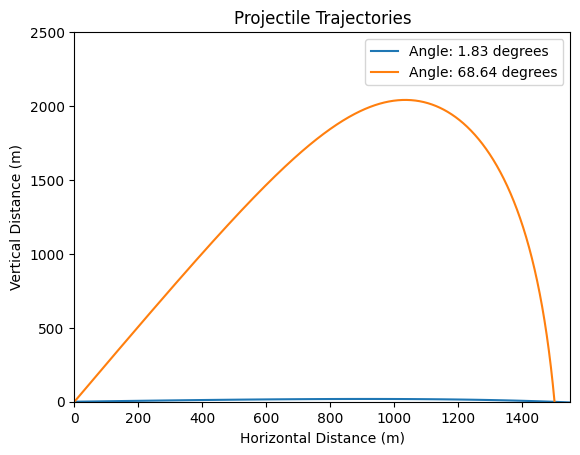

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

t_ = np.linspace(0, 200, 5000)

for alpha in alpha_target:
    ax.set_xlim(0, 1550)
    ax.set_ylim(0, 2500)
    X0 = np.array([0, v0*np.cos(alpha), 0, v0*np.sin(alpha)])
    x_n = odeint(state_space_model, X0, t_)
    print(max(x_n[:, 2]), "max height")
    ax.plot(x_n[:, 0], x_n[:, 2],  label=f'Angle: {alpha*180/np.pi:.2f} degrees')

    ax.set_xlabel('Horizontal Distance (m)')
    ax.set_ylabel('Vertical Distance (m)')
    ax.set_title('Projectile Trajectories')
    plt.legend()

plt.show()


###Max heights: 18.6337 m, 2041.3772 m

###Plot the air drag

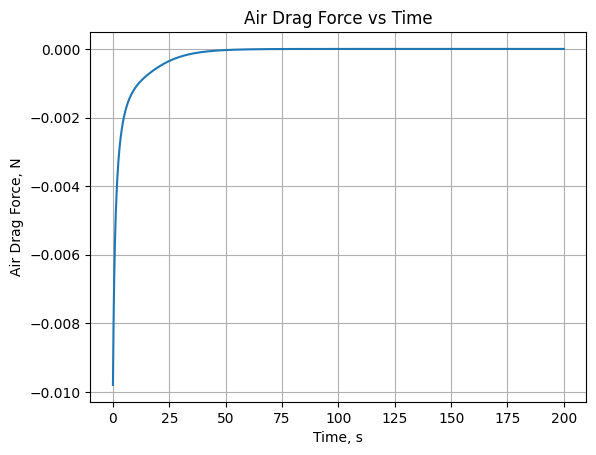

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the constants
k = 1.3 * 1e-5
m = 13.6 * 1e-3
v0 = 870
g = 9.81
L = 1500

# Define the model
def state_space_model(x, t):
    # Unpack the state vector
    x, x_dot, y, y_dot = x

    # System equations
    dxdt = x_dot
    dxdotdt = -(k/m) * x_dot * np.sqrt(x_dot**2 + y_dot**2)
    dydt = y_dot
    dydotdt = -(k/m) * y_dot * np.sqrt(x_dot**2 + y_dot**2) - g

    # Return the derivatives
    return [dxdt, dxdotdt, dydt, dydotdt]

# Time array
t = np.linspace(0, 200, 5000)

# Initial conditions
alpha = 30 * np.pi / 180  # Initial angle in radians
X0 = np.array([0, v0*np.cos(alpha), 0, v0*np.sin(alpha)])

# Solve the ODE
x_nl = odeint(state_space_model, X0, t)

# Calculate air drag force
drag_force = -k * np.sqrt(x_nl[:, 1]**2 + x_nl[:, 3]**2) * x_nl[:, 1] / np.sqrt(x_nl[:, 1]**2 + x_nl[:, 3]**2)

# Plot the air drag force
plt.plot(t, drag_force)
plt.xlabel('Time, s')
plt.ylabel('Air Drag Force, N')
plt.title('Air Drag Force vs Time')
plt.grid(True)
plt.show()
